In [29]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [30]:
#!pip install tensorflow==2.7.0

In [31]:
#Digit MNIST dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [32]:
X_train_digit[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [33]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

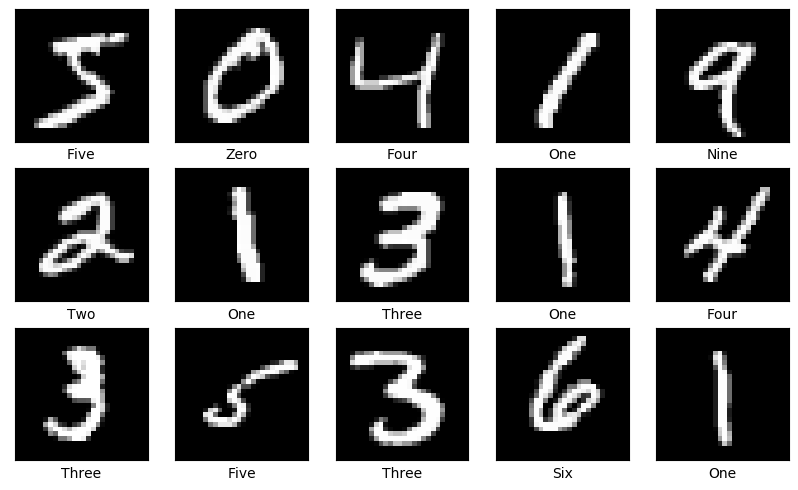

In [6]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [7]:
X_train_digit.shape

(60000, 28, 28)

In [8]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [9]:
X_train_digit.shape

(60000, 784)

In [10]:
y_test_digit.shape

(10000,)

In [11]:
#Encoding Digit MNIST Labels
y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [12]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

In [14]:
#param_number = output_channel_number * (input_channel_number + 1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [16]:
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 1.4385 - accuracy: 0.8419 - val_loss: 0.3713 - val_accuracy: 0.9076
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2709 - accuracy: 0.9265 - val_loss: 0.2345 - val_accuracy: 0.9379
Epoch 3/10
600/600 [==============================] - 3s 4ms/step - loss: 0.1793 - accuracy: 0.9495 - val_loss: 0.2085 - val_accuracy: 0.9446
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1500 - accuracy: 0.9578 - val_loss: 0.1863 - val_accuracy: 0.9525
Epoch 5/10
600/600 [==============================] - 3s 4ms/step - loss: 0.1296 - accuracy: 0.9628 - val_loss: 0.1840 - val_accuracy: 0.9564
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1099 - accuracy: 0.9682 - val_loss: 0.1751 - val_accuracy: 0.9548
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0997 - accuracy: 0.9718 - val_loss: 0.1643 - val_accuracy: 0.9610
Epoch 

In [17]:
#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)


In [18]:
y_predict[0]

array([9.8802197e-01, 8.9179516e-01, 9.9999905e-01, 9.9715614e-01,
       2.6881963e-02, 9.0189922e-01, 2.0838727e-19, 1.0000000e+00,
       5.2283930e-08, 9.3330681e-01], dtype=float32)

In [19]:
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector


In [20]:
y_predicts

array([7, 2, 1, ..., 4, 0, 0], dtype=int64)

In [21]:
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [22]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

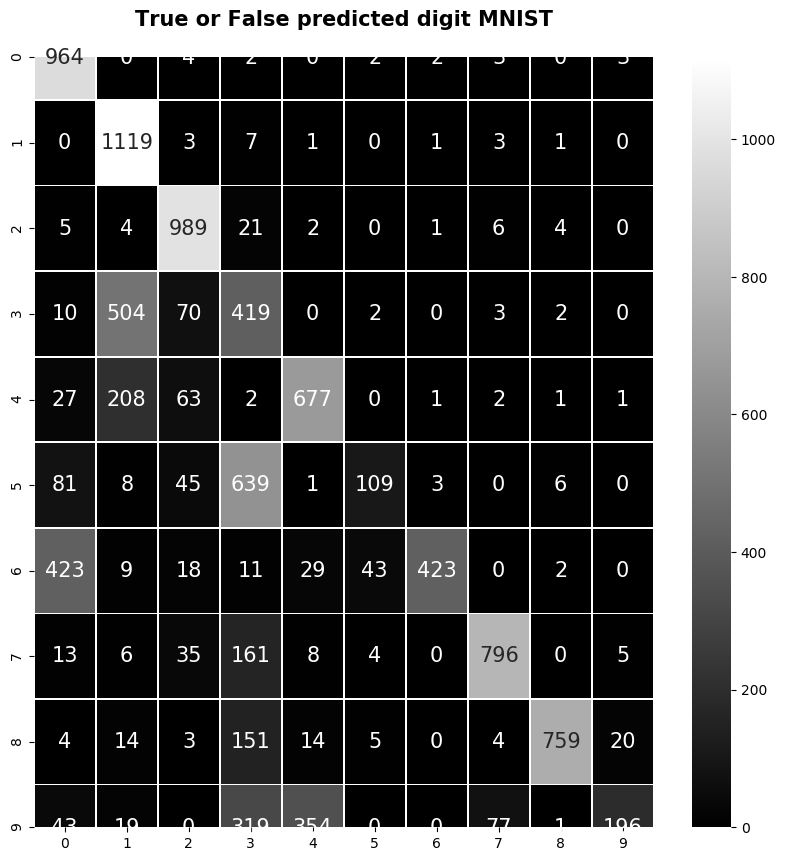

In [23]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.61      0.98      0.76       980
           1       0.59      0.99      0.74      1135
           2       0.80      0.96      0.87      1032
           3       0.24      0.41      0.31      1010
           4       0.62      0.69      0.65       982
           5       0.66      0.12      0.21       892
           6       0.98      0.44      0.61       958
           7       0.89      0.77      0.83      1028
           8       0.98      0.78      0.87       974
           9       0.87      0.19      0.32      1009

    accuracy                           0.65     10000
   macro avg       0.73      0.63      0.62     10000
weighted avg       0.72      0.65      0.62     10000



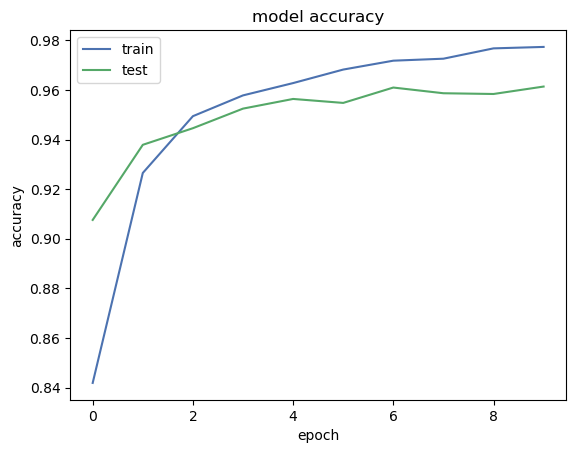

In [25]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


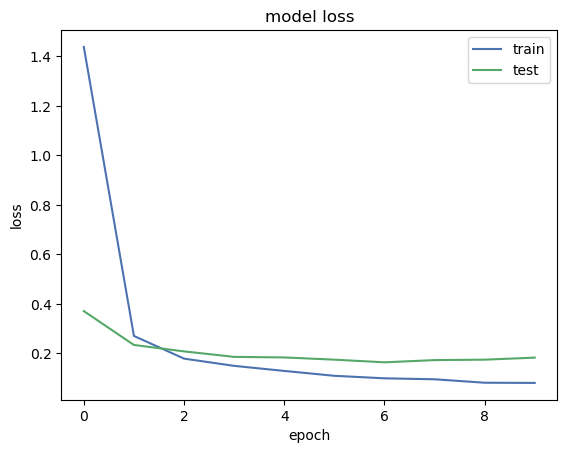

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [27]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

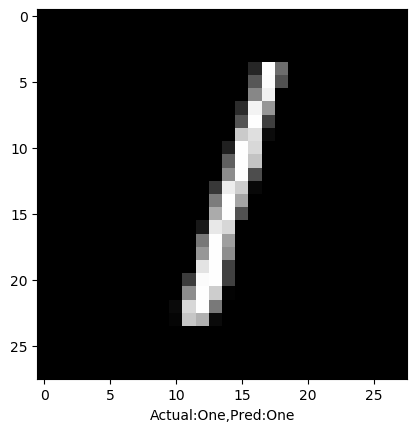

In [28]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()